# Public Saftey Metric

### By Benjamin Solomon

When posed with the task, "find the best neighborhood", I had to first come up with what it would mean to be the best. One thing that is important for me is peace of mind. This correlates to how safe a given neighborhood is, which in turn correlates to the crime rates in each neighborhood. Luckily, there is a great dataset provided by the WPRDC that covers just that. So, I will be attempting to determine the best neighborhood by analyzing data about crime.

*This dataset describes the number and type of crimes in each neighboorhood, as well as the overall population of each.*

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

*Here is a sample of the dataset. It is a list of neighborhood and crimes, with numbers marking how many of each crime type occured in each neighborhood. It also shows how many crimes were commited as a ratio to total population*

In [2]:
# load in the crime info file
crimes = pd.read_csv("public-safety.csv")

# look at the first ten rows of the data
crimes.sample(10)

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
28,East Liberty,12,"5,869",488,446,302,8.3,7.6,2,2,63,40,64,59,57
52,Mount Washington,6,"8,799",434,428,282,4.9,4.9,0,3,22,23,115,38,44
78,Stanton Heights,13,"4,601",67,88,67,1.5,1.9,0,1,3,4,20,12,7
70,South Shore,16,19,37,60,50,194.7,315.8,0,0,4,1,5,2,3
44,Larimer,12,"1,728",139,125,90,8.0,7.2,3,1,16,19,33,24,22
55,North Oakland,14,"10,551",182,136,160,1.7,1.3,0,0,16,7,35,13,12
71,South Side Flats,7,"6,597",669,770,537,10.1,11.7,1,6,52,61,74,56,53
72,South Side Slopes,7,"4,423",210,203,172,4.7,4.6,0,0,15,14,65,23,27
8,Beltzhoover,6,"1,925",83,131,85,4.3,6.8,1,0,6,10,28,8,38
80,Summer Hill,1,"1,051",13,22,13,1.2,2.1,0,0,0,1,2,2,1


There's a column that is not of much practical use for our given metric, such as Sector #. Thus, we can go ahead and get rid of that column. Additionally, I do not plan on taking population size into consideration, so I can get rid of those columns too.

In [3]:
del crimes["Sector #"]
del crimes["Population (2010)"]
del crimes["Part 1 Crime per 100 Persons (2010)"]
del crimes["Part 2 Crime per 100 Persons (2010)"]


crimes.sample(10)

,Neighborhood,#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
45,Lincoln Place,32,63,33,0,0,1,3,11,2,0
37,Hays,15,17,7,0,0,0,1,5,4,1
78,Stanton Heights,67,88,67,0,1,3,4,20,12,7
68,Sheraden,222,384,184,2,3,21,21,73,25,61
74,Spring Hill-City View,121,173,49,0,0,15,15,32,9,52
49,Marshall-Shadeland,222,307,126,1,0,26,24,65,21,31
55,North Oakland,182,136,160,0,0,16,7,35,13,12
83,Troy Hill,163,176,91,1,0,19,10,46,12,27
28,East Liberty,488,446,302,2,2,63,40,64,59,57
85,Upper Lawrenceville,92,184,73,0,0,12,9,24,12,29


*Some of the crimes recorded are worse than others. To reflect this in my analysis, I will weight the different columns accordingly. Severity based on typical jail sentence length for each crime*

In [4]:
#major crimes are weighted twice as heavily
crimes["#Part 1 (Major Crime) Reports (2010)"]=crimes["#Part 1 (Major Crime) Reports (2010)"]*2
#Non major crime reports stay as is (redundant to write here)
crimes["#Part 2 Reports (2010)"]=crimes["#Part 2 Reports (2010)"]*1
#other police reports are only weighted 0.6 as much
crimes["#Other Police Reports (2010)"]=crimes["#Other Police Reports (2010)"]*0.6
#murder reports are weighted as 3 times as important
crimes["#Murder (2010)"]=crimes["#Murder (2010)"]*3
#rape is similarly weighted 3 times as important
crimes["#Rape (2010)"]=crimes["#Rape (2010)"]*3
#robbery is moved down to 0.6 times as important
crimes["#Robbery (2010)"]=crimes["#Robbery (2010)"]*0.6
#Agr. Assult will be weighted by 1.5
crimes["#Agr. Assault (2010)"]=crimes["#Agr. Assault (2010)"]*1.5
#Burglary will remain the same at 1
crimes["#Burglary (2010)"]=crimes["#Burglary (2010)"]*1
#Auto theft will be slightly higher than burglary at 1.5
crimes["#Auto Theft (2010)"]=crimes["#Auto Theft (2010)"]*1.5
#Drug violations will be weighted at only 0.5
crimes["#Drug Violations (2010)"]=crimes["#Drug Violations (2010)"]*0.5


crimes.sample(10)

,Neighborhood,#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
38,Hazelwood,318,215,74.4,3,0,6.0,25.5,47,37.5,22.0
68,Sheraden,444,384,110.4,6,9,12.6,31.5,73,37.5,30.5
83,Troy Hill,326,176,54.6,3,0,11.4,15.0,46,18.0,13.5
15,Carrick,906,539,213.0,3,6,29.4,42.0,118,72.0,29.0
2,Allentown,318,252,96.0,0,6,9.0,34.5,48,16.5,33.0
5,Banksville,124,81,36.6,0,0,1.2,7.5,9,7.5,3.5
40,Homewood North,396,190,81.0,9,9,8.4,49.5,68,36.0,11.5
75,Squirrel Hill North,296,110,72.0,0,0,2.4,4.5,33,24.0,7.5
46,Lincoln-Lemington-Belmar,266,176,67.8,0,0,11.4,19.5,34,28.5,7.5
23,Crawford-Roberts,258,197,61.2,0,0,9.6,15.0,20,31.5,45.0


*Now, lets add up all the weighted crimes to see what the total crime count for each neighborhood is*

In [6]:
crime_totals = pd.DataFrame(columns=['Neighborhood','Total Crime'])

total=crimes.sum(axis=1)   

i=0
length=len(crimes)

while(i<length):
    crime_totals = crime_totals.append({'Neighborhood': crimes['Neighborhood'].iloc[i], 'Total Crime': total[i]}, ignore_index=True)
    i+=1;
        
crime_totals.sample(10)

,Neighborhood,Total Crime
40,Homewood North,858.4
34,Garfield,828.3
70,South Shore,177.4
47,Lower Lawrenceville,474.6
77,St. Clair,55.0
38,Hazelwood,748.4
72,South Side Slopes,869.2
6,Bedford Dwellings,226.5
71,South Side Flats,2758.4
30,Esplen,172.2


*To view the data more easily, I sort the data so that neighborhood with the most crime is on the left, and least on the right.*

In [7]:
crime_totals=crime_totals.sort_values(by=['Total Crime'], ascending=False)

In [8]:
crime_totals['Total Crime']

71    2758.4
16    2590.1
15    1957.4
67    1903.9
28    1894.0
       ...  
77      55.0
66      52.7
26      42.1
54      27.9
31      18.4
Name: Total Crime, Length: 90, dtype: float64

*Now, I just need to print out my results to see what the best neighborhood is based on my analysis*

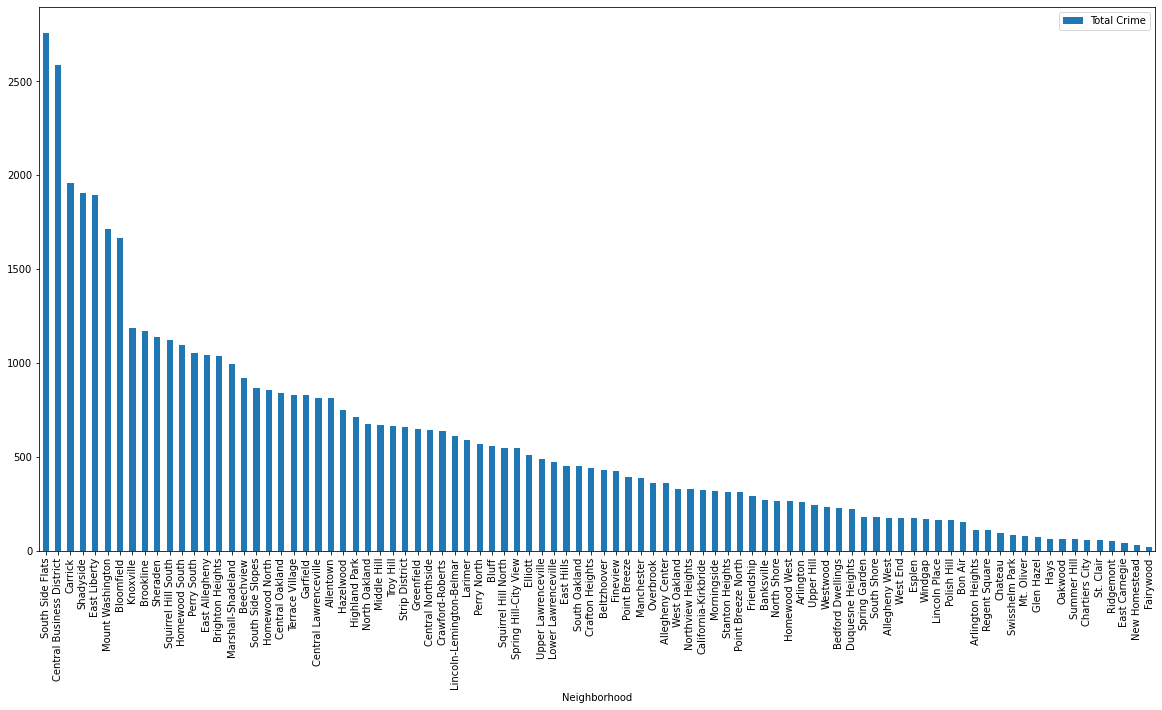

In [9]:
crime_totals.plot.bar(x="Neighborhood", y="Total Crime", figsize=(20,10),stacked=True)

*As you can see from the graph, Fairywood has the least crime, and South Side Flats has the most. Thus, according to this dataset and my analysis on it, Fairywood is the best neighborhood in Pittsburgh.*